In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers.core import Activation, Dropout, Flatten, Dense
from keras.layers import Convolution2D as Conv2D
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator, load_img
import warnings

from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import os

from keras.preprocessing.image import ImageDataGenerator, array_to_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [2]:
warnings.filterwarnings('ignore')

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Activation, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing import image
from sklearn.metrics import confusion_matrix

In [4]:
input_dir = "../input/chest-xray-pneumonia/chest_xray/"
train_dir = input_dir +"train/"
test_dir = input_dir +"test/"
val_dir = input_dir +"val/"

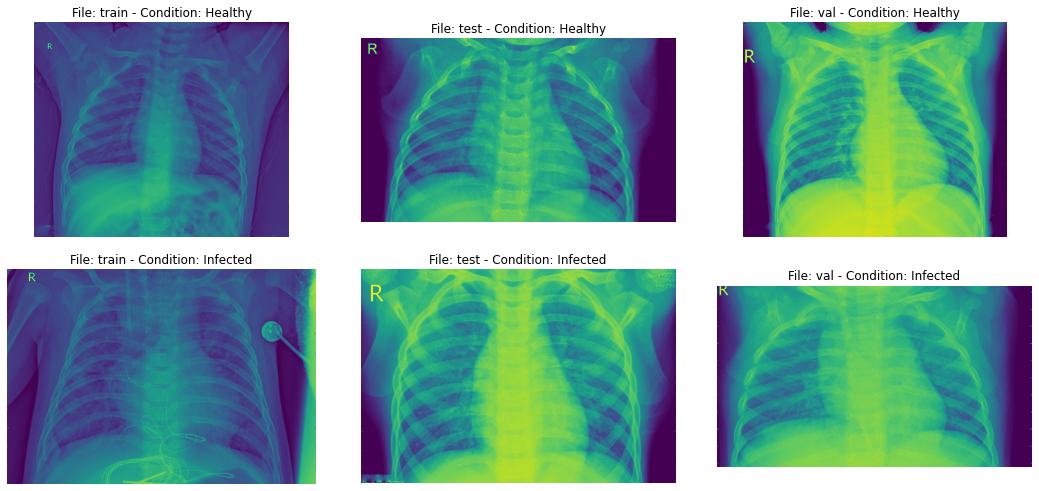

In [5]:
fig, ax = plt.subplots(2,3, figsize=(15,7))
ax = ax.ravel()
plt.tight_layout()
for i, _set in enumerate(['train','test','val']):
    set_path = input_dir+_set
    ax[i].axis('off')
    ax[i].imshow(plt.imread(set_path+'/NORMAL/'+os.listdir(set_path+'/NORMAL')[0]))
    ax[i].set_title('File: {} - Condition: Healthy'.format(_set))
    ax[i+3].axis('off')
    ax[i+3].imshow(plt.imread(set_path+'/PNEUMONIA/'+os.listdir(set_path+'/PNEUMONIA')[0]))
    ax[i+3].set_title('File: {} - Condition: Infected'.format(_set))

In [6]:
input_shape=(64,64,3)
model = Sequential([
    Conv2D(32, (3,3), input_shape=input_shape),
    MaxPool2D((2, 2)),
    
    Conv2D(32, (3,3)),
    MaxPool2D((2, 2)),
    
    Conv2D(64, (3,3)),
    MaxPool2D((2, 2)),
    
    Conv2D(64, (3,3)),
    MaxPool2D((2, 2)),
    
    Flatten(),
    
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          3

In [7]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

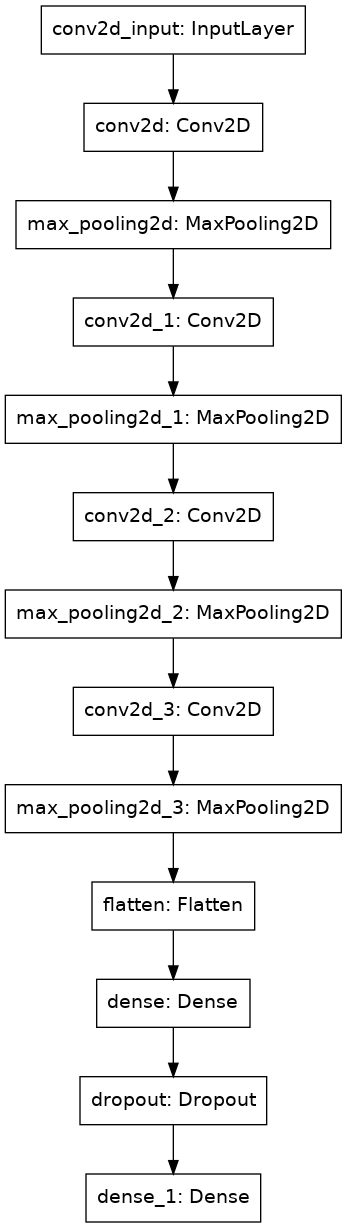

In [8]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

In [9]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        '../input/chest-xray-pneumonia/chest_xray/train',
        target_size=(64, 64),
        batch_size=64,
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        '../input/chest-xray-pneumonia/chest_xray/test',
        target_size=(64, 64),
        batch_size=64,
        class_mode='binary')
hist=model.fit(
        train_generator,
        steps_per_epoch=82,
        epochs=100,
        validation_data=validation_generator,
        validation_steps=82)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/100
82/82 [==============================] - 94s 1s/step - loss: 0.6041 - accuracy: 0.6827 - val_loss: 0.8845 - val_accuracy: 0.4455
Epoch 2/100
82/82 [==============================] - 48s 589ms/step - loss: 0.3770 - accuracy: 0.8219
Epoch 3/100
82/82 [==============================] - 49s 597ms/step - loss: 0.2648 - accuracy: 0.8890
Epoch 4/100
82/82 [==============================] - 48s 589ms/step - loss: 0.2357 - accuracy: 0.8958
Epoch 5/100
82/82 [==============================] - 49s 596ms/step - loss: 0.2174 - accuracy: 0.9117
Epoch 6/100
82/82 [==============================] - 48s 588ms/step - loss: 0.1725 - accuracy: 0.9302
Epoch 7/100
82/82 [==============================] - 49s 592ms/step - loss: 0.1761 - accuracy: 0.9330
Epoch 8/100
82/82 [==============================] - 48s 590ms/step - loss: 0.1531 - accuracy: 0.9366
Epoch 9/100
82/82 [==============================] - 48s 592ms

In [10]:
scores = model.evaluate(validation_generator)
print("Loss of the model: %.2f"%(scores[0]))
print("Test Accuracy: %.2f%%"%(scores[1] * 100))

10/10 [==============================] - 4s 447ms/step - loss: 0.4854 - accuracy: 0.9022
Loss of the model: 0.49
Test Accuracy: 90.22%


In [11]:
cnn_model = model.fit_generator(train_generator,
                         steps_per_epoch = 163,
                         epochs = 1,
                         validation_data = validation_generator,
                         validation_steps = 624)

163/163 [==============================] - 55s 331ms/step - loss: 0.0421 - accuracy: 0.9862 - val_loss: 0.3972 - val_accuracy: 0.9038


In [12]:
scores = model.evaluate(validation_generator)
print("Loss of the model: %.2f"%(scores[0]))
print("Test Accuracy: %.2f%%"%(scores[1] * 100))

10/10 [==============================] - 5s 432ms/step - loss: 0.3972 - accuracy: 0.9038
Loss of the model: 0.40
Test Accuracy: 90.38%


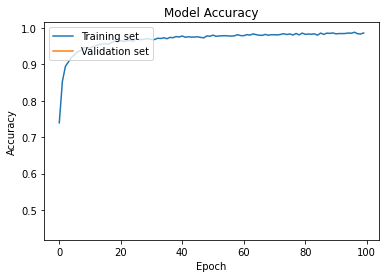

In [13]:
# Accuracy 
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

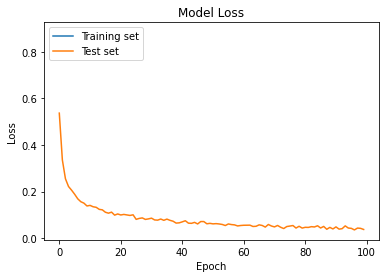

In [18]:
# Loss 
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()

In [21]:
model.save('custom_model.h5py')

[[0.27833295]]
This image is 72.17 percent NORMAL


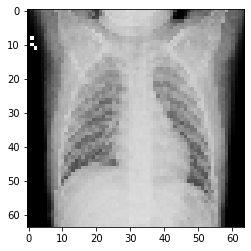

In [22]:
def predict_image(filename):
    img = load_img(filename, target_size=(64, 64))
    image = keras.preprocessing.image.img_to_array(img)
    image = image / 255.0
    image = image.reshape(1,64,64,3)
    model = tf.keras.models.load_model('custom_model.h5py')
    prediction = model.predict(image)
    print(prediction)
    plt.imshow(img)
    if(prediction[0] > 0.5):
        stat = prediction[0] * 100 
        print("This image is %.2f percent %s"% (stat, "PNEUMONIA"))
    else:
        stat = (1.0 - prediction[0]) * 100
        print("This image is %.2f percent %s" % (stat, "NORMAL"))

predict_image("../input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg")


[[0.79625314]]
This image is 79.63 percent PNEUMONIA


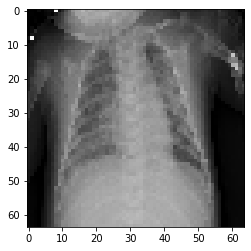

In [26]:
predict_image("../input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg")